In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# Load your dataset
df=pd.read_csv("C:\\Users\\techp\\Desktop\\Projects\\DataScience\\Supermart Grocery Sales - Retail Analytics Dataset.csv")
# Assuming your dataset is stored in a DataFrame called 'df'



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       1499 non-null   object 
 1   Customer Name  1499 non-null   object 
 2   Category       1499 non-null   object 
 3   Sub Category   1499 non-null   object 
 4   City           1499 non-null   object 
 5   Order_Date     1499 non-null   object 
 6   Region         1499 non-null   object 
 7   Sales          1499 non-null   float64
 8   Discount       1499 non-null   float64
 9   Profit         1499 non-null   float64
 10  State          1499 non-null   object 
dtypes: float64(3), object(8)
memory usage: 858.8+ KB


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
import statsmodels.api as sm

In [7]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Convert the 'Order Date' column to a datetime object
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Set 'Order Date' as the index
df.set_index('Order_Date', inplace=True)

# Resample the data by a specific frequency (e.g., monthly)
# You can adjust the frequency as needed (e.g., 'M' for monthly)
resampled_data = df['Sales'].resample('M').sum()

# Split the data into training and testing sets
train_size = int(len(resampled_data) * 0.8)
train, test = resampled_data[:train_size], resampled_data[train_size:]

# Fit an ARIMA model to the training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.forecast(steps=len(test))

# Calculate RMSE to evaluate the model
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Time Series Forecasting')
plt.show()

KeyError: 'Order_Date'

In [10]:
# Print the DataFrame to inspect the columns
print(df.head())


           Order ID Customer Name          Category      Sub Category  \
Order_Date                                                              
2017-11-08      OD1        Harish      Oil & Masala           Masalas   
2017-11-08      OD2         Sudha         Beverages     Health Drinks   
2017-06-12      OD3       Hussain       Food Grains      Atta & Flour   
2016-10-11      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   
2016-10-11      OD5       Ridhesh       Food Grains   Organic Staples   

                   City Region   Sales  Discount  Profit       State  
Order_Date                                                            
2017-11-08      Vellore  North  1254.0      0.12  401.28  Tamil Nadu  
2017-11-08  Krishnagiri  South   749.0      0.18  149.80  Tamil Nadu  
2017-06-12   Perambalur   West  2360.0      0.21  165.20  Tamil Nadu  
2016-10-11   Dharmapuri  South   896.0      0.25   89.60  Tamil Nadu  
2016-10-11         Ooty  South  2355.0      0.26  918.45  Tami

C:\Users\techp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\techp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\techp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\techp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, Future

Root Mean Squared Error (RMSE): 27051.16800487617


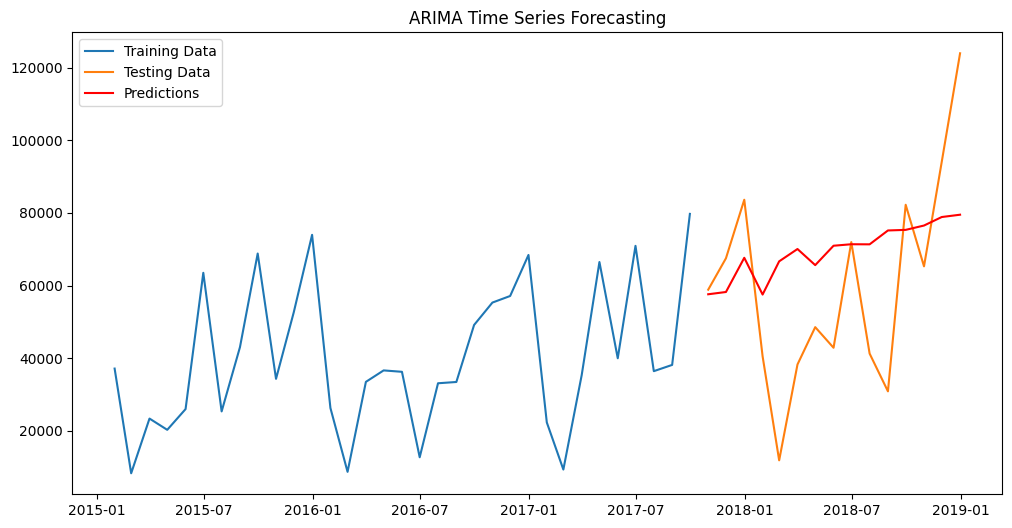

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you already have the DataFrame 'df' with 'Order_Date' as the index

# Resample the data by a specific frequency (e.g., monthly)
# You can adjust the frequency as needed (e.g., 'M' for monthly)
resampled_data = df['Sales'].resample('M').sum()

# Split the data into training and testing sets
train_size = int(len(resampled_data) * 0.7)
train, test = resampled_data[:train_size], resampled_data[train_size:]

# Fit an ARIMA model to the training data
model = ARIMA(train, order=(5, 2, 1))
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Calculate RMSE to evaluate the model
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Time Series Forecasting')
plt.show()

C:\Users\techp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\techp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\techp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\techp\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

Root Mean Squared Error (RMSE): 64454.97464723088


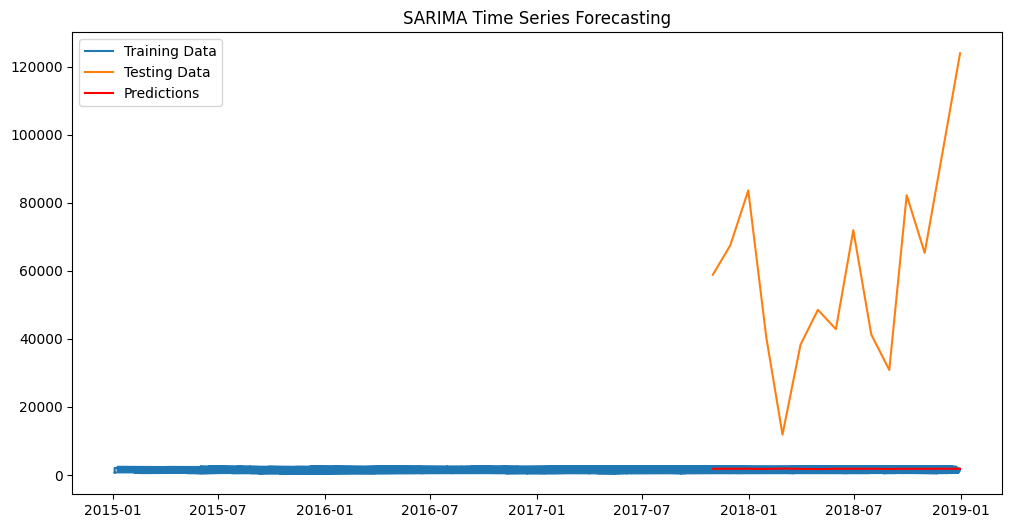

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming you have loaded and preprocessed your dataset with 'Order_Date' as the index

# Define SARIMA hyperparameters (p, d, q, P, D, Q, S)
p, d, q, P, D, Q, S = 1, 1, 1, 1, 1, 1, 12  # Example values; adjust as needed

# Fit SARIMA model
model = SARIMAX(df['Sales'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.predict(start=len(df), end=len(df) + len(test) - 1, dynamic=False)

# Calculate RMSE to evaluate the model
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.title('SARIMA Time Series Forecasting')
plt.show()